In [251]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd

Miles_df =("Avg mileage per state - Sheet1.csv")
Car_df = ("Top Cars in each state EV_Gasoline - Sheet1.csv")
Prices_df =("Avg Gas and Electric per state - Sheet1.csv")
Miles_df = pd.read_csv(Miles_df)
Car_df = pd.read_csv(Car_df)
Prices_df = pd.read_csv(Prices_df)
Miles_df = Miles_df.rename(columns = {"Miles": "Avg Miles Driven per state"})
combined_Car_df = pd.merge(Car_df, Miles_df,
                                 how='outer', on='States')

In [252]:
Prices_df = Prices_df.rename(columns = {"Regular": "Average Price per Gallon"})
Prices_df = Prices_df.rename(columns = {"Average EV per Gallon": "Average Price per Gallon EV"})
Combined_Car_df = pd.merge(combined_Car_df, Prices_df,
                                 how='outer', on='States')
Combined_Car_df = Combined_Car_df.rename(columns = {"Electrical ": "Electrical"})
Gas_Miles_Df= Combined_Car_df[['States','Regular','Electrical','Avg Miles Driven per state',
                               'Average Price per Gallon']].copy()

In [253]:
Ev_Regualar_DF = ("Electric Vs Regular - Sheet1.csv")
Ev_Regualar_DF = pd.read_csv(Ev_Regualar_DF)
Ev_Regualar_DF['MPG'] = Ev_Regualar_DF['MPG'].fillna(0)
Ev_Regualar_DF['kWh/100 mi'] = Ev_Regualar_DF['kWh/100 mi'].fillna(0)
Ev_Regualar_DF['Max Gallons'] = Ev_Regualar_DF['Max Mileage']/Ev_Regualar_DF['MPG']
Ev_Regualar_DF['Max EV kWh'] = Ev_Regualar_DF['Max Mileage']/(100/Ev_Regualar_DF['kWh/100 mi'])
kWh_rate = ("kWh Rate per state - Sheet1.csv")
kWh_rate = pd.read_csv(kWh_rate)

In [254]:
Ev_Regular_DF= Ev_Regualar_DF[['Model','Types','List Pricing','Max Mileage','MPG',
                                   'kWh/100 mi','Max Gallons','Max EV kWh']].copy()
Regular_DF = Ev_Regular_DF
indexNames = Regular_DF[ Regular_DF['Types'] == 'Electric' ].index
Regular_DF.drop(indexNames , inplace=True)
Regular_DF = Regular_DF.assign(Types='Regular')
del Regular_DF['kWh/100 mi']
del Regular_DF['Max EV kWh']
Regular_DF = Regular_DF.rename(columns = {"Model": "Regular"})
Regular_DF['Regular'] = Regular_DF['Regular'].str.replace('Ram Pickup', 'RAM 1500')
Regular_DF

,Regular,Types,List Pricing,Max Mileage,MPG,Max Gallons
3,Chevrolet Silverado,Regular,48485,450,20.0,22.500000
4,Ford F-Series,Regular,28745,500,22.0,22.727273
5,GMC Sierra,Regular,44000,440,17.0,25.882353
6,Honda Civic,Regular,20000,430,37.0,11.621622
7,Honda CR-V,Regular,25150,406,31.0,13.096774
11,RAM 1500,Regular,32154,560,22.0,25.454545
16,Toyota Camry,Regular,24970,686,33.0,20.787879
17,Toyota Corolla,Regular,19600,488,35.0,13.942857
18,Toyota RAV4,Regular,25950,400,30.0,13.333333
19,Toyota Tacoma,Regular,26050,380,20.0,19.000000


In [255]:
EV_DF = Ev_Regualar_DF[['Model','Types','List Pricing','Max Mileage','MPG',
                                   'kWh/100 mi','Max Gallons','Max EV kWh']].copy()
indexNames = EV_DF[ EV_DF['Types'] == 'Regular'].index
EV_DF.drop(indexNames , inplace=True)
indexNames = EV_DF[ EV_DF['Types'] == 'Gasoline'].index
EV_DF.drop(indexNames , inplace=True)
indexNames = EV_DF[ EV_DF['Types'] == 'Diesel'].index
EV_DF.drop(indexNames , inplace=True)
del EV_DF['MPG']
del EV_DF['Max Gallons']
EV_DF = EV_DF.rename(columns = {"Model": "Electrical"})
EV_DF['Electrical'] = EV_DF['Electrical'].str.replace('Nissan Leaf', 'Nissan LEAF')
EV_DF['Electrical'] = EV_DF['Electrical'].str.replace('Chevrolet Bolt', 'Chevy Bolt')
EV_DF

,Electrical,Types,List Pricing,Max Mileage,kWh/100 mi,Max EV kWh
0,Audi eTron,Electric,77400,204,46.0,93.84
1,BMW i8,Electric,44450,310,30.0,93.00
2,Chevy Bolt,Electric,36620,238,29.0,69.02
8,Hyundai Kona,Electric,37190,258,27.0,69.66
9,Hyundai Ioniq,Electric,33945,193,25.0,48.25
10,Nissan LEAF,Electric,31600,157,30.0,47.10
12,Tesla Model 3,Electric,37990,348,26.0,90.48
13,Tesla Model S,Electric,69420,379,30.0,113.70
14,Tesla Model X,Electric,79990,315,35.0,110.25
15,Tesla Model Y,Electric,49900,314,28.0,87.92


In [256]:
Gas_Miles_Df.loc[:,'Regular'] = 'Ford F-Series'
Gas_Miles_Df.loc[:,'Electrical'] = 'Tesla Model 3'

In [257]:
Regular_Combined_df = pd.merge(Gas_Miles_Df, Regular_DF,
                                 how='outer', on='Regular')
del Regular_Combined_df['Types']
del Regular_Combined_df['Electrical']
Regular_Combined_df['Max Gallons']= Regular_Combined_df["Max Gallons"].map("{:,.2f}".format)
Regular_Combined_df.head()

,States,Regular,Avg Miles Driven per state,Average Price per Gallon,List Pricing,Max Mileage,MPG,Max Gallons
0,AL,Ford F-Series,"16,054",$2.07,28745,500,22.0,22.73
1,AK,Ford F-Series,"9,915",$2.53,28745,500,22.0,22.73
2,AZ,Ford F-Series,"14,493",$2.31,28745,500,22.0,22.73
3,AR,Ford F-Series,"14,974",$2.06,28745,500,22.0,22.73
4,CA,Ford F-Series,"14,435",$3.29,28745,500,22.0,22.73


In [258]:
EV_Combined_df = pd.merge(Gas_Miles_Df, EV_DF,
                                 how='outer', on='Electrical')
EV_Combined_df = pd.merge(EV_Combined_df, kWh_rate,
                                 how='outer', on='States')
Ev_Regular_DF.head()
del EV_Combined_df['Types']
del EV_Combined_df['Regular']
del EV_Combined_df['Average Price per Gallon']
EV_Combined_df['Avg kWh Rate'].round(5)
EV_Combined_df.head()

,States,Electrical,Avg Miles Driven per state,List Pricing,Max Mileage,kWh/100 mi,Max EV kWh,Avg kWh Rate
0,AL,Tesla Model 3,"16,054",37990,348,26.0,90.48,21.79
1,AK,Tesla Model 3,"9,915",37990,348,26.0,90.48,11.76
2,AZ,Tesla Model 3,"14,493",37990,348,26.0,90.48,9.30
3,AR,Tesla Model 3,"14,974",37990,348,26.0,90.48,12.12
4,CA,Tesla Model 3,"14,435",37990,348,26.0,90.48,18.31


In [259]:
Regular_Combined_df['Average Price per Gallon'] = Regular_Combined_df['Average Price per Gallon'].str.replace('$', '')
Regular_Combined_df['Average Price per Gallon'] = Regular_Combined_df['Average Price per Gallon'].astype('float')
Regular_Combined_df['Max Gallons'] = Regular_Combined_df['Max Gallons'].astype('float')

In [260]:
Regular_Combined_df['Full Gasoline Price'] = (Regular_Combined_df['Max Gallons'] * Regular_Combined_df['Average Price per Gallon'])
Regular_Combined_df['Avg Miles Driven per state'] = Regular_Combined_df['Avg Miles Driven per state'].str.replace(',', '')
Regular_Combined_df['Avg Miles Driven per state'] = Regular_Combined_df['Avg Miles Driven per state'].astype('float')
Regular_Combined_df['Yearly Gas Price']= (Regular_Combined_df['Avg Miles Driven per state']/Regular_Combined_df['Max Mileage'])*Regular_Combined_df['Full Gasoline Price']
Regular_Combined_df['Yearly Gas Price']= Regular_Combined_df["Yearly Gas Price"].map("{:,.2f}".format)
Regular_Combined_df = Regular_Combined_df.iloc[:-9]
Regular_Combined_df

,States,Regular,Avg Miles Driven per state,Average Price per Gallon,List Pricing,Max Mileage,MPG,Max Gallons,Full Gasoline Price,Yearly Gas Price
0,AL,Ford F-Series,16054.0,2.07,28745,500,22.0,22.73,47.0511,"1,510.72"
1,AK,Ford F-Series,9915.0,2.53,28745,500,22.0,22.73,57.5069,"1,140.36"
2,AZ,Ford F-Series,14493.0,2.31,28745,500,22.0,22.73,52.5063,"1,521.95"
3,AR,Ford F-Series,14974.0,2.06,28745,500,22.0,22.73,46.8238,"1,402.28"
4,CA,Ford F-Series,14435.0,3.29,28745,500,22.0,22.73,74.7817,"2,158.95"
5,CO,Ford F-Series,13443.0,2.28,28745,500,22.0,22.73,51.8244,"1,393.35"
6,CT,Ford F-Series,11595.0,2.33,28745,500,22.0,22.73,52.9609,"1,228.16"
7,DE,Ford F-Series,14802.0,2.42,28745,500,22.0,22.73,55.0066,"1,628.42"
8,FL,Ford F-Series,11836.0,2.30,28745,500,22.0,22.73,52.2790,"1,237.55"
9,GA,Ford F-Series,18920.0,2.15,28745,500,22.0,22.73,48.8695,"1,849.22"


In [261]:
EV_Combined_df['Avg Miles Driven per state'] = EV_Combined_df['Avg Miles Driven per state'].str.replace(',', '')
EV_Combined_df['Avg Miles Driven per state'] = EV_Combined_df['Avg Miles Driven per state'].astype('float')
EV_Combined_df.fillna(0)
import pandas as pd
pd.options.mode.chained_assignment = None 
EV_Combined_df['Yearly Electric Price']= ((EV_Combined_df['Avg Miles Driven per state']/EV_Combined_df['Max Mileage'])*(EV_Combined_df['Max EV kWh']*EV_Combined_df['Avg kWh Rate']))/100
EV_Combined_df['Yearly Electric Price']= EV_Combined_df["Yearly Electric Price"].map("{:,.2f}".format)
EV_Combined_df = EV_Combined_df.iloc[:-9]

In [262]:
EV_Yearly_Price = EV_Combined_df[['States','Electrical','List Pricing','Yearly Electric Price']].copy()
Regular_Yearly_Price = Regular_Combined_df[['States','Regular','List Pricing','Yearly Gas Price']].copy()
EV_Yearly_Price = EV_Yearly_Price.rename(columns = {"List Pricing": "EV List Pricing"})
Regular_Yearly_Price = Regular_Yearly_Price.rename(columns = {"List Pricing": "Regular List Pricing"})
Yearly_Price_Both = pd.merge(Regular_Yearly_Price, EV_Yearly_Price,
                                 how='outer', on='States')
Yearly_Price_Both['Yearly Gas Price'] = Yearly_Price_Both['Yearly Gas Price'].str.replace(',', '')
Yearly_Price_Both['Yearly Gas Price'] = Yearly_Price_Both['Yearly Gas Price'].astype('float')
Yearly_Price_Both['Yearly Electric Price'] = EV_Combined_df['Yearly Electric Price'].str.replace(',', '')
Yearly_Price_Both['Yearly Electric Price'] = Yearly_Price_Both['Yearly Electric Price'].astype('float')

In [270]:
Yearly_Price_Both['Yearly Price Difference'] = Yearly_Price_Both['Yearly Gas Price'] - Yearly_Price_Both['Yearly Electric Price']
Yearly_Price_Both['List Price Difference'] = Yearly_Price_Both['Regular List Pricing'] - Yearly_Price_Both['EV List Pricing']
Yearly_Price_Both['First Year Overall difference'] = ((Yearly_Price_Both['Yearly Price Difference']) + Yearly_Price_Both['List Price Difference'])

In [272]:
Top_3_Difference = Yearly_Price_Both.nlargest(3, 'Yearly Price Difference')
Top_3_Difference

,States,Regular,Regular List Pricing,Yearly Gas Price,Electrical,EV List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,10 Year difference,First Year Overall difference
49,WY,Ford F-Series,28745,2212.12,Tesla Model 3,37990,597.42,1614.70,-9245,6902.0,-7630.30
4,CA,Ford F-Series,28745,2158.95,Tesla Model 3,37990,687.19,1471.76,-9245,5472.6,-7773.24
35,OK,Ford F-Series,28745,1751.92,Tesla Model 3,37990,436.16,1315.76,-9245,3912.6,-7929.24


In [273]:
Bottom_3_Difference = Yearly_Price_Both.nsmallest(3, 'Yearly Price Difference')
Bottom_3_Difference

,States,Regular,Regular List Pricing,Yearly Gas Price,Electrical,EV List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,10 Year difference,First Year Overall difference
38,RI,Ford F-Series,28745,1313.11,Tesla Model 3,37990,753.67,559.44,-9245,-3650.6,-8685.56
6,CT,Ford F-Series,28745,1228.16,Tesla Model 3,37990,648.16,580.00,-9245,-3445.0,-8665.00
0,AL,Ford F-Series,28745,1510.72,Tesla Model 3,37990,909.52,601.20,-9245,-3233.0,-8643.80


In [274]:
Yearly_Price_Both['10 Year difference'] = ((Yearly_Price_Both['Yearly Price Difference'] * 10) + Yearly_Price_Both['List Price Difference'])
Yearly_Price_Both

,States,Regular,Regular List Pricing,Yearly Gas Price,Electrical,EV List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,10 Year difference,First Year Overall difference
0,AL,Ford F-Series,28745,1510.72,Tesla Model 3,37990,909.52,601.20,-9245,-3233.0,-8643.80
1,AK,Ford F-Series,28745,1140.36,Tesla Model 3,37990,303.16,837.20,-9245,-873.0,-8407.80
2,AZ,Ford F-Series,28745,1521.95,Tesla Model 3,37990,350.44,1171.51,-9245,2470.1,-8073.49
3,AR,Ford F-Series,28745,1402.28,Tesla Model 3,37990,471.86,930.42,-9245,59.2,-8314.58
4,CA,Ford F-Series,28745,2158.95,Tesla Model 3,37990,687.19,1471.76,-9245,5472.6,-7773.24
5,CO,Ford F-Series,28745,1393.35,Tesla Model 3,37990,416.28,977.07,-9245,525.7,-8267.93
6,CT,Ford F-Series,28745,1228.16,Tesla Model 3,37990,648.16,580.00,-9245,-3445.0,-8665.00
7,DE,Ford F-Series,28745,1628.42,Tesla Model 3,37990,467.21,1161.21,-9245,2367.1,-8083.79
8,FL,Ford F-Series,28745,1237.55,Tesla Model 3,37990,358.51,879.04,-9245,-454.6,-8365.96
9,GA,Ford F-Series,28745,1849.22,Tesla Model 3,37990,541.60,1307.62,-9245,3831.2,-7937.38


In [275]:
Top_3_List_Dif = Yearly_Price_Both.nlargest(3, '10 Year difference')
Top_3_List_Dif

,States,Regular,Regular List Pricing,Yearly Gas Price,Electrical,EV List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,10 Year difference,First Year Overall difference
49,WY,Ford F-Series,28745,2212.12,Tesla Model 3,37990,597.42,1614.70,-9245,6902.0,-7630.30
4,CA,Ford F-Series,28745,2158.95,Tesla Model 3,37990,687.19,1471.76,-9245,5472.6,-7773.24
35,OK,Ford F-Series,28745,1751.92,Tesla Model 3,37990,436.16,1315.76,-9245,3912.6,-7929.24


In [276]:
Bottom_3_List_Dif = Yearly_Price_Both.nsmallest(3, '10 Year difference')
Bottom_3_List_Dif

,States,Regular,Regular List Pricing,Yearly Gas Price,Electrical,EV List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,10 Year difference,First Year Overall difference
38,RI,Ford F-Series,28745,1313.11,Tesla Model 3,37990,753.67,559.44,-9245,-3650.6,-8685.56
6,CT,Ford F-Series,28745,1228.16,Tesla Model 3,37990,648.16,580.00,-9245,-3445.0,-8665.00
0,AL,Ford F-Series,28745,1510.72,Tesla Model 3,37990,909.52,601.20,-9245,-3233.0,-8643.80


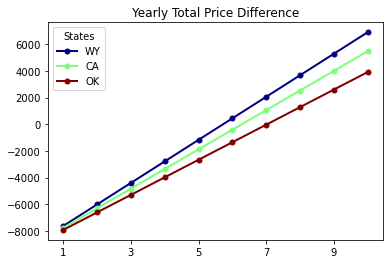

In [277]:
Time_DF = Top_3_List_Dif[["States","First Year Overall difference","Yearly Price Difference",'List Price Difference']].copy()
Time_DF = Time_DF.rename(columns={"First Year Overall difference": '1'})
Time_DF['2'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 2))
Time_DF['3'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 3))
Time_DF['4'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 4))
Time_DF['5'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 5))
Time_DF['6'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 6))
Time_DF['7'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 7))
Time_DF['8'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 8))
Time_DF['9'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 9))
Time_DF['10'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 10))
del Time_DF['Yearly Price Difference']
del Time_DF['List Price Difference']
Time_DF = Time_DF.set_index("States").T

Time_DF.plot(lw=2, colormap='jet', marker='.', markersize=10, 
         title='Yearly Total Price Difference')

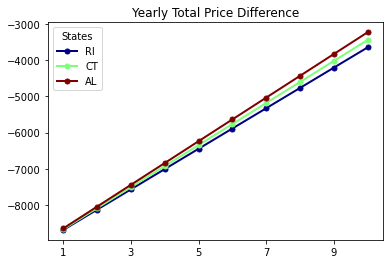

In [278]:
Time_DF = Bottom_3_List_Dif[["States","First Year Overall difference","Yearly Price Difference",'List Price Difference']].copy()
Time_DF = Time_DF.rename(columns={"First Year Overall difference": '1'})
Time_DF['2'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 2))
Time_DF['3'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 3))
Time_DF['4'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 4))
Time_DF['5'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 5))
Time_DF['6'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 6))
Time_DF['7'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 7))
Time_DF['8'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 8))
Time_DF['9'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 9))
Time_DF['10'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 10))
del Time_DF['Yearly Price Difference']
del Time_DF['List Price Difference']
Time_DF = Time_DF.set_index("States").T

Time_DF.plot(lw=2, colormap='jet', marker='.', markersize=10, 
         title='Yearly Total Price Difference')

# Electrical version with Toyota Camry instead of the Ford F150 with focus on Sedan due to same type of car

In [140]:
Gas_Miles_Df.loc[:,'Regular'] = 'Toyota Camry'
Regular_Combined_df = pd.merge(Gas_Miles_Df, Regular_DF,
                                 how='outer', on='Regular')
del Regular_Combined_df['Types']
del Regular_Combined_df['Electrical']
Regular_Combined_df['Max Gallons']= Regular_Combined_df["Max Gallons"].map("{:,.2f}".format)
Regular_Combined_df.head()

,States,Regular,Avg Miles Driven per state,Average Price per Gallon,List Pricing,Max Mileage,MPG,Max Gallons
0,AL,Toyota Camry,"16,054",$2.07,24970,686,33.0,20.79
1,AK,Toyota Camry,"9,915",$2.53,24970,686,33.0,20.79
2,AZ,Toyota Camry,"14,493",$2.31,24970,686,33.0,20.79
3,AR,Toyota Camry,"14,974",$2.06,24970,686,33.0,20.79
4,CA,Toyota Camry,"14,435",$3.29,24970,686,33.0,20.79


In [141]:
Regular_Combined_df['Average Price per Gallon'] = Regular_Combined_df['Average Price per Gallon'].str.replace('$', '')
Regular_Combined_df['Average Price per Gallon'] = Regular_Combined_df['Average Price per Gallon'].astype('float')
Regular_Combined_df['Max Gallons'] = Regular_Combined_df['Max Gallons'].astype('float')
Regular_Combined_df['Full Gasoline Price'] = (Regular_Combined_df['Max Gallons'] * Regular_Combined_df['Average Price per Gallon'])
Regular_Combined_df['Avg Miles Driven per state'] = Regular_Combined_df['Avg Miles Driven per state'].str.replace(',', '')
Regular_Combined_df['Avg Miles Driven per state'] = Regular_Combined_df['Avg Miles Driven per state'].astype('float')
Regular_Combined_df['Yearly Gas Price']= (Regular_Combined_df['Avg Miles Driven per state']/Regular_Combined_df['Max Mileage'])*Regular_Combined_df['Full Gasoline Price']
Regular_Combined_df['Yearly Gas Price']= Regular_Combined_df["Yearly Gas Price"].map("{:,.2f}".format)
Regular_Combined_df = Regular_Combined_df.iloc[:-9]

In [142]:
Regular_Yearly_Price = Regular_Combined_df[['States','Regular','List Pricing','Yearly Gas Price']].copy()
Regular_Yearly_Price = Regular_Yearly_Price.rename(columns = {"List Pricing": "Regular List Pricing"})
Yearly_Price_Both = pd.merge(Regular_Yearly_Price, EV_Yearly_Price,
                                 how='outer', on='States')
Yearly_Price_Both['Yearly Gas Price'] = Yearly_Price_Both['Yearly Gas Price'].str.replace(',', '')
Yearly_Price_Both['Yearly Gas Price'] = Yearly_Price_Both['Yearly Gas Price'].astype('float')
Yearly_Price_Both['Yearly Electric Price'] = EV_Combined_df['Yearly Electric Price'].str.replace(',', '')
Yearly_Price_Both['Yearly Electric Price'] = Yearly_Price_Both['Yearly Electric Price'].astype('float')

In [143]:
Yearly_Price_Both = Yearly_Price_Both.rename(columns = {"EV List Pricing": "Tesla 3 List Pricing"})
Yearly_Price_Both = Yearly_Price_Both.rename(columns = {"Regular List Pricing": "Toyota Camry List Pricing"})
del Yearly_Price_Both['Regular']
del Yearly_Price_Both['Electrical']
Yearly_Price_Both['Yearly Price Difference'] = Yearly_Price_Both['Yearly Gas Price'] - Yearly_Price_Both['Yearly Electric Price']
Yearly_Price_Both['List Price Difference'] = Yearly_Price_Both['Toyota Camry List Pricing'] - Yearly_Price_Both['Tesla 3 List Pricing']
Yearly_Price_Both['First Year Overall difference'] = ((Yearly_Price_Both['Yearly Price Difference']) + Yearly_Price_Both['List Price Difference'])
Yearly_Price_Both['10 Year Overall difference'] = ((Yearly_Price_Both['Yearly Price Difference'] * 10) + Yearly_Price_Both['List Price Difference'])
Yearly_Price_Both

,States,Toyota Camry List Pricing,Yearly Gas Price,Tesla 3 List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,First Year Overall difference,10 Year Overall difference
0,AL,24970,1007.13,37990,909.52,97.61,-13020,-12922.39,-12043.9
1,AK,24970,760.23,37990,303.16,457.07,-13020,-12562.93,-8449.3
2,AZ,24970,1014.61,37990,350.44,664.17,-13020,-12355.83,-6378.3
3,AR,24970,934.84,37990,471.86,462.98,-13020,-12557.02,-8390.2
4,CA,24970,1439.27,37990,687.19,752.08,-13020,-12267.92,-5499.2
5,CO,24970,928.88,37990,416.28,512.60,-13020,-12507.40,-7894.0
6,CT,24970,818.76,37990,648.16,170.60,-13020,-12849.40,-11314.0
7,DE,24970,1085.59,37990,467.21,618.38,-13020,-12401.62,-6836.2
8,FL,24970,825.02,37990,358.51,466.51,-13020,-12553.49,-8354.9
9,GA,24970,1232.79,37990,541.60,691.19,-13020,-12328.81,-6108.1


In [145]:
Top_3_List_Dif = Yearly_Price_Both.nlargest(3, '10 Year Overall difference')
Top_3_List_Dif

,States,Toyota Camry List Pricing,Yearly Gas Price,Tesla 3 List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,First Year Overall difference,10 Year Overall difference
49,WY,24970,1474.72,37990,597.42,877.30,-13020,-12142.70,-4247.0
46,WA,24970,1077.64,37990,314.07,763.57,-13020,-12256.43,-5384.3
4,CA,24970,1439.27,37990,687.19,752.08,-13020,-12267.92,-5499.2


In [248]:
Bottom_3_List_Dif = Yearly_Price_Both.nsmallest(3, '10 Year Overall difference')
Bottom_3_List_Dif

,States,Toyota Camry List Pricing,Yearly Gas Price,Tesla 3 List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,First Year Overall difference,10 Year Overall difference
0,AL,24970,1007.13,37990,909.52,97.61,-13020,-12922.39,-12043.9
38,RI,24970,875.39,37990,753.67,121.72,-13020,-12898.28,-11802.8
6,CT,24970,818.76,37990,648.16,170.60,-13020,-12849.40,-11314.0


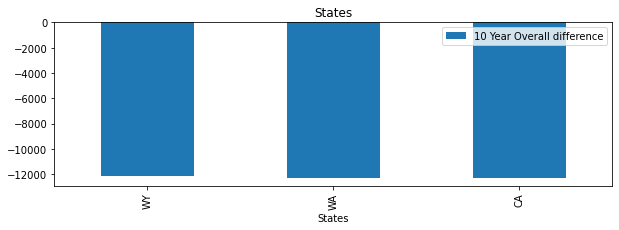

<Figure size 432x288 with 0 Axes>

In [156]:
TopCar_data = Top_3_List_Dif[["States","First Year Overall difference"]]
TopCar_data  = TopCar_data.rename(columns={"First Year Overall difference": "10 Year Overall difference"})
TopCar_data  = TopCar_data .set_index('States')
# Set the xlabel and ylabel using class methods
TopCar_data .plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("States")

plt.show()
plt.tight_layout()

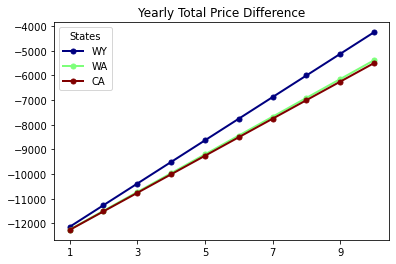

In [247]:
Time_DF = Top_3_List_Dif[["States","First Year Overall difference","Yearly Price Difference",'List Price Difference']].copy()
Time_DF = Time_DF.rename(columns={"First Year Overall difference": '1'})
Time_DF['2'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 2))
Time_DF['3'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 3))
Time_DF['4'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 4))
Time_DF['5'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 5))
Time_DF['6'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 6))
Time_DF['7'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 7))
Time_DF['8'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 8))
Time_DF['9'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 9))
Time_DF['10'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 10))
del Time_DF['Yearly Price Difference']
del Time_DF['List Price Difference']
Time_DF = Time_DF.set_index("States").T

Time_DF.plot(lw=2, colormap='jet', marker='.', markersize=10, 
         title='Yearly Total Price Difference')

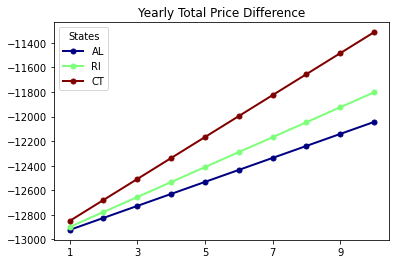

In [249]:
Time_DF = Bottom_3_List_Dif[["States","First Year Overall difference","Yearly Price Difference",'List Price Difference']].copy()
Time_DF = Time_DF.rename(columns={"First Year Overall difference": '1'})
Time_DF['2'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 2))
Time_DF['3'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 3))
Time_DF['4'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 4))
Time_DF['5'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 5))
Time_DF['6'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 6))
Time_DF['7'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 7))
Time_DF['8'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 8))
Time_DF['9'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 9))
Time_DF['10'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 10))
del Time_DF['Yearly Price Difference']
del Time_DF['List Price Difference']
Time_DF = Time_DF.set_index("States").T

Time_DF.plot(lw=2, colormap='jet', marker='.', markersize=10, 
         title='Yearly Total Price Difference')